# Энергия ферромагнетика 2D (2023)

### Условие задачи

**Дано:**
- двумерная решетка молекул, расположенных в узлах кристаллической решетки, размеров $L_x \times L_y$ с периодическими границами
- каждая молекула обладает спином +1 или -1
- межмолекулярное взаимодействие описывается константами $J_{ij} = 1$
- модель Изинга


**Требуется:**
- согласно модели Изинга рассчитать нормированное значение средней энергии $\frac{\langle E \rangle}{Lx Ly}$ для указанной решетки молекул при:
    - размерах решетки $L_x \in [2, 3, ..., 8]$, $L_y = 4$
    - температурах $kT \in [1.0, 5.0)$ с шагом $0.1$
- сохранить массив средних энергий при помощи `np.save`
- вывести время расчета каждой итерации по $Lx$ или по $k T$
- отобразить цветовую карту:
    - ось абсцисс - $L_x$,
    - ось ординат - $k T$,
    - цветом отобразить нормированное значение средней энергии $\frac{\langle E \rangle}{Lx Ly}$,
    - подписать оси,
    - отобразить цветовую шкалу (`colorbar`),
    - засечки должны соответствовать значениям $Lx, kT$.
- к каждой функции добавить `docstring` с описанием того, что функция делает, всех параметров и возвращаемого значения    

**Описание:**

**Одномерный случай**

Модель Изинга является моделью магнетика. Пусть этот магнетик состоит из молекул, расположенных в узлах регулярной решетки. Пусть всего таких узлов будет $N$ штук, с индексами $i=1,\ldots, N$.

Предположим, что каждая молекула может быть представлена в виде магнитной стрелки, которая всегда либо направлена вдоль некоторой заданной оси, либо в противоположном направлении. То есть каждая молекула $i$ имеет две конфигурации, которые можно описывать с помощью "спиновой" переменной $\sigma_i$. Эта переменная принимает значение $+1$ (параллельно оси, спин направлен вверх) и $-1$ (антипараллельно оси, спин направлен вниз).

Пусть $\sigma = \{\sigma_1, \sigma_2, \ldots, \sigma_N\}$ обозначает набор значений всех $N$ спинов. Имеется $2^N$ различных наборов $\sigma$, и каждый из них описывает некоторое состояние системы.

Гамильтониан системы  состоит из двух частей: первая $E_0$ включает вклад межмолекулярных сил внутри магнетика, а вторая $E_1(\sigma)$ вклад от взаимодействий каждого спина с внешним магнитным полем (здесь считается нулевым).
$$H(\sigma)=E_0(\sigma)+E_1(\sigma)$$

В любой физической системе мы предполагаем все взаимодействия инвариантными по отношению к обращению времени, что означает инвариантность $E$ при изменении знаков всех полей и намагниченностей. Энергия должна быть четной функцией от $\sigma$:
$$E_0(\sigma_1,\ldots, \sigma_N)=E_0(-\sigma_1,\ldots, -\sigma_N)$$

Энергия системы при нулевом внешнем магнитном поле равна сумме произведений **соседних** спинов на константы взаимодействия $J_{ij}$
$$E(\sigma) = -\sum_{i} J_{i,i+1}\sigma_{i}\sigma_{i+1} $$

Вероятность находиться в состоянии $\sigma$
$$P(\sigma)=\frac{e^{-\beta E(\sigma)}}{Z},$$
	где $Z = \sum_{\sigma} e^{-\beta E(\sigma)}-$ статистическая сумма, $\beta = \frac{1}{k T}-$ обратная температура, $k-$ константа Больцмана.

Средняя энергия системы
$$\langle E \rangle = \frac{1}{Z}\sum_{\{\sigma \}} E(\sigma)e^{-\frac{E(\sigma)}{kT}}$$
рассчитывается по всевозможным состояниям системы, т.е. всевозможным наборам $\sigma$.

**Двумерный случай**

В случае двумерной решетки энергия системы при нулевом внешнем магнитном поле вычисляется следующим образом:
$$E(\sigma) = -\sum_{i,j} J_{ij}(\sigma_{i,j}\sigma_{i+1,j} + \sigma_{i,j}\sigma_{i,j+1})$$


**Проверка корректности результатов**

Нормированное значение средней энергии при температурах $kT \in [1.0, 5.0)$:

- для $L_x=4$

```
 -1.99715844 -1.99396091 -1.98856632 -1.98016965 -1.96786355 -1.95064256
 -1.9274244  -1.89711215 -1.85871667 -1.81153907 -1.75538029 -1.69071311
 -1.61874282 -1.54131149 -1.46065977 -1.37911648 -1.29880759 -1.22145424
 -1.14828469 -1.0800446  -1.01706963 -0.95938399 -0.90679838 -0.85899291
 -0.8155803  -0.77615005 -0.74029707 -0.70763857 -0.67782287 -0.65053286
 -0.62548613 -0.60243323 -0.58115501 -0.56145948 -0.5431787  -0.52616582
 -0.5102923  -0.49544555 -0.48152673 -0.46844889
```

- для $L_x=5$

```
 -1.99715893 -1.99396296 -1.98857263 -1.98018387 -1.96788363 -1.95063964
 -1.92729692 -1.89661121 -1.85735639 -1.80853133 -1.74965024 -1.68103752
 -1.60399878 -1.52075577 -1.43412763 -1.3470633  -1.26219309 -1.18153361
 -1.10638872 -1.03740747 -0.97472647 -0.918132   -0.86720255 -0.82141645
 -0.78022445 -0.74309384 -0.70953215 -0.67909749 -0.65140075 -0.62610332
 -0.60291264 -0.58157686 -0.56187952 -0.54363452 -0.52668165 -0.51088271
 -0.49611811 -0.48228409 -0.46929029 -0.45705774
```

**Материалы:**
- [Бэкстер Р., Вольский Е. П., Дайхин Л. И. Точно решаемые модели в статистической механике](https://yadi.sk/i/2oY4c0bL08pNiw)
- [Пример хорошего `docstring`](https://github.com/numpy/numpy/blob/v1.21.0/numpy/linalg/linalg.py#L313-L395)
- [Зиннуров Б.Д., Якименко В.Я. Магнитные свойства модели Изинга в низких размерностях (МКР)](https://miem.hse.ru/data/2018/05/24/1149431665/model_Izinga_-_Zinnurov_Yakimenko.pdf)


**Правила оценивания:**

- оценка за корректно выполненный расчет для количества молекул в цепочке $L_x$, баллов из 100:
```
    Lx    =   2,   3,   4,   5,    6,    7,     8
    g(Lx) = 1.0, 1.8, 3.3, 6.4, 12.6, 24.9,  50.0
```
    
- штрафы $p(i)$, баллов:
    - не выведено время расчета - 20
    - не выведены значения средней энергии - 20
    - не построена карта - 20
    - отсутствует `docstring` - 20
    - менее значимые недоработки - 10


- итоговая оценка за задание = $\sum_{Lx=2}^{8}{g(Lx)} - \sum_{i}{p(i)}$


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time
from math import exp
from datetime import datetime
from itertools import product

from numba import njit, prange, objmode

Вероятность находиться в состоянии $\sigma$
$$P(\sigma)=\frac{e^{-\beta E(\sigma)}}{Z},$$
	где $Z = \sum_{\sigma} e^{-\beta E(\sigma)}-$ статистическая сумма, $\beta = \frac{1}{k T}-$ обратная температура, $k-$ константа Больцмана.

Средняя энергия системы
$$\langle E \rangle = \frac{1}{Z}\sum_{\{\sigma \}} E(\sigma)e^{-\frac{E(\sigma)}{kT}}$$
рассчитывается по всевозможным состояниям системы, т.е. всевозможным наборам $\sigma$.


In [2]:
# Для заданных параметров 
@njit(parallel=True)
def mean_energy_proto(L_x, L_y, kT):
    '''
    принимает на вход размер кристаллической решетки и значение температуры
    возвращает среднюю  энергию системы
    '''
    N = L_x * L_y
    J = 1
    Z = 0
    E_sum = 0
    for k in prange(2**N):
        E = 0
        spins =  np.empty(N, dtype=np.int8)
        x = np.int64(k)
        for i in range(N):
            spins[i] = (x & 1) * 2 - 1
            x = x >> 1
        spins = spins.reshape(L_x, L_y)
        for i in range(-1, L_x-1):
            for j in range(-1, L_y-1):
                 E -= spins[i, j] * (spins[i, j + 1] + spins[i + 1, j]) * J      
        e = exp(-E/kT)
        E_sum += E * e
        Z += e
    E_sum /= Z
    return E_sum / N

In [3]:
@njit(parallel=True)
def mean_energy_all(L_x, L_y, kT):
    '''
    принимает на вход массив длин l_x, длину l_y и массив температур
    для каждой длины высчитывает значение средних энергий при заданных
    температур из массива температур
    возвращает массив средних энергий при каждой заданной длине l_x и температурах из массива kT
    '''    
    mean_energy = np.empty((len(L_x),len(kT)))
    for l_ind in range(len(L_x)):
        with objmode(st='f8'):
            st = time.time() 
        N = L_x[l_ind]* L_y
        for temp_ind in range(len(kT)):
            J = 1
            Z = 0
            E_sum = 0
            for k in prange(2**N):
                E = 0
                spins =  np.empty(N, dtype=np.int8)
                x = np.int64(k)
                for i in range(N):
                    spins[i] = (x & 1) * 2 - 1
                    x = x >> 1
                spins = spins.reshape(L_x[l_ind], L_y)
                for i in range(-1, L_x[l_ind]-1):
                    for j in range(-1, L_y-1):
                        E -= spins[i, j] * (spins[i, j + 1] + spins[i + 1, j]) * J      
                e = exp(-E/kT[temp_ind])
                E_sum += E * e
                Z += e
            E_sum /= Z
            mean_energy[l_ind, temp_ind] = E_sum / N
        with objmode():
            print("L_x = ", L_x[l_ind] , "time = " , time.time() - st)        
    return mean_energy         

In [4]:
L_x = np.array([2, 3, 4, 5, 6, 7, 8]).astype(int)
L_y = 4
# размеры решетки 
kT = np.arange(1, 5, 0.1)
En = mean_energy_all(L_x, L_y, kT)
np.save("mean_enegy_L_x.npy", En)


L_x =  2 time =  0.01562809944152832
L_x =  3 time =  0.0
L_x =  4 time =  0.11821961402893066
L_x =  5 time =  1.8110034465789795
L_x =  6 time =  29.570679664611816
L_x =  7 time =  523.1565153598785
L_x =  8 time =  9079.175816059113


In [5]:
energy = np.load("mean_enegy_L_x.npy")

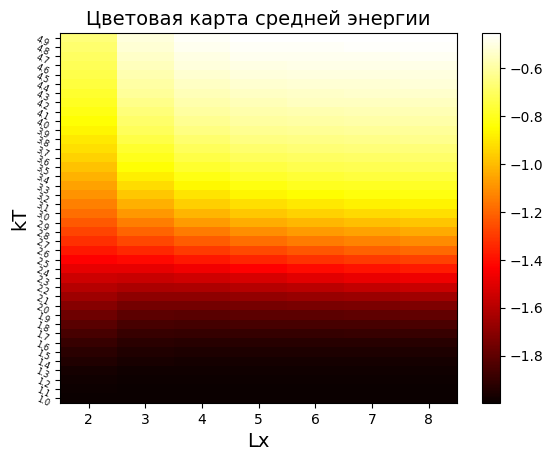

In [11]:
L_x = np.array([2, 3, 4, 5, 6, 7, 8]).astype(int)
L_y = 4
kT = np.arange(1, 5, 0.1)
plt.pcolormesh( L_x, kT, np.transpose(energy),cmap ='hot')
plt.xlabel('Lx', fontsize=14)
plt.ylabel('kT', fontsize=14)
plt.colorbar()
plt.xticks(L_x)
plt.yticks(kT,fontsize=6,rotation=-25)
plt.title('Цветовая карта средней энергии', fontsize=14)
plt.show()

In [2]:
energy = np.load("mean_enegy_L_x.npy")

In [6]:
for i in range(len(energy[:,1])):
    print('L_x = ', i+2, )
    print(energy[i,:],'\n')

L_x =  2
[-1.99509474 -1.98967862 -1.98074878 -1.96731117 -1.94851445 -1.92375828
 -1.89277291 -1.85565639 -1.81286316 -1.76514762 -1.71347563 -1.65892227
 -1.60257405 -1.5454491  -1.48844224 -1.43229537 -1.3775895  -1.3247523
 -1.27407538 -1.22573609 -1.17982015 -1.13634286 -1.09526756 -1.05652101
 -1.02000562 -0.98560898 -0.9532109  -0.92268862 -0.89392045 -0.86678827
 -0.84117913 -0.8169862  -0.79410926 -0.77245486 -0.75193626 -0.73247322
 -0.71399168 -0.69642337 -0.67970548 -0.66378023] 

L_x =  3
[-1.99711779 -1.99383665 -1.98825271 -1.97949351 -1.96659182 -1.94853206
 -1.92432618 -1.89312223 -1.85433583 -1.80777902 -1.75375117 -1.69305981
 -1.62695673 -1.55700043 -1.48487836 -1.41223059 -1.34050963 -1.27089443
 -1.20425882 -1.14118312 -1.08199278 -1.02680913 -0.97560137 -0.92823315
 -0.88450084 -0.84416295 -0.80696158 -0.77263715 -0.7409381  -0.71162671
 -0.68448222 -0.65930219 -0.63590256 -0.61411702 -0.5937959  -0.57480491
 -0.55702372 -0.54034463 -0.52467121 -0.50991714] 

L_x